# Forecast and Predictions Project
### Gym retention strategy research

#### Project description

The gym chain Model Fitness is developing a customer interaction strategy based on analytical data.
In order to fight churn, Model Fitness has digitized a number of its customer profiles. 
Our task is to analyze them to come up with a customer retention strategy.

Research goals are:

1. predict the probability of churn (for the upcoming month) for each customer
2. Draw up typical user portraits: select the most outstanding groups and describe their main features
3. Analyze the factors that impact churn most
4. Draw basic conclusions and develop recommendations on how to improve customer service:
        a. Identify target groups
        b. Suggest measures to cut churn
        c. Describe any other patterns you see with respect to interaction with customers

#### Table of contents

* [1. General info](#1.-General-info) 

    * [Data legend](#Data-legend)

<p/>   

* [2. EDA](#2.-EDA)         
       
    * [Missing features, mean values and standard deviation](#Look-at-the-dataset:-does-it-contain-any-missing-features?-Study-the-mean-values-and-standard-deviation,-use-the-describe()-method)
       
    * [Mean feature values: left vs stayed](#Look-at-the-mean-feature-values-in-two-groups:-for-those-who-left-(churn)-and-for-those-who-stayed,-use-the-groupby()-method)
    
    * [Histograms and distributions: left vs stayed ](#Plot-bar-histograms-and-feature-distributions-for-those-who-left-(churn)-and-those-who-stayed)   
    
    * [Correlation matrix and heatmap](#Build-a-correlation-matrix-and-display-it)       
<p/>      

* [3. Churn prediction model](#3.-Churn-prediction-model)
       
    * [The data divided into train and validation sets](#Divide-the-data-into-train-and-validation-sets-using-the-train_test_split()-function)
       
    * [Logistic regression model](#Logistic-regression-model)
    
    * [Random forest model](#Random-forest-model)
  
    * [Gradient boosting model](#Gradient-boosting-model)
    
    * [Evaluation, models comparion](#Evaluate-accuracy,-precision,-and-recall-for-both-models-using-the-validation-data.-Compare-the-models.)    
 <p/> 
* [Step 4. User clusters](#Step-4.-User-clusters)         
       
    * [The data standardized](#Standardize-the-data)
       
    * [Matrix of distances, dendrogram](#Use-the-linkage()-function-to-build-a-matrix-of-distances-based-on-the-standardized-feature-matrix-and-plot-a-dendrogram.-Note:-rendering-the-dendrogram-may-take-time!-Use-the-resulting-graph-to-estimate-the-number-of-clusters-you-can-single-out.)
    
    * [K-means, clusters](#Train-the-clustering-model-with-the-K-means-algorithm-and-predict-customer-clusters.)   
    
    * [Mean feature values for clusters](#Look-at-the-mean-feature-values-for-clusters.-Does-anything-catch-your-eye?)     
    
    * [Distributions of features for the clusters](#Plot-distributions-of-features-for-the-clusters.-Do-you-notice-anything?)   
<p/> 
* [5. Conclusions and Recommendations](#5.-Conclusions-and-Recommendations)

### 1. General info

#### Data legend
<br>Model Fitness provided you with CSV files containing data on churn for a given month and information on the month preceding it. The dataset includes the following fields:

'Churn' — the fact of churn for the month in question
<br>Current dataset fields:
* User data for the preceding month
       * 'gender'
       * 'Near_Location' — whether the user lives or works in the neighborhood where the gym is located
       * 'Partner' — whether the user is an employee of a partner company (the gym has partner companies whose employees get discounts; in those cases the gym stores information on customers' employers)
       * Promo_friends — whether the user originally signed up through a "bring a friend" offer (they used a friend's promo code when paying for their first membership)
       * 'Phone' — whether the user provided their phone number
       * 'Age'
       * 'Lifetime' — the time (in months) since the customer first came to the gym
* Data from the log of visits and purchases and data on current membership status
       * 'Contract_period' — 1 month, 3 months, 6 months, or 1 year
       * 'Month_to_end_contract' — the months remaining until the contract expires
       * 'Group_visits' — whether the user takes part in group sessions
       * 'Avg_class_frequency_total' — average frequency of visits per week over the customer's lifetime
       * 'Avg_class_frequency_current_month' — average frequency of visits per week over the preceding month
       * 'Avg_additional_charges_total' — the total amount of money spent on other gym services: cafe, athletic goods, 
        cosmetics, massages, etc.

In [1]:
pip install sweetviz

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 15.1 MB 13.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sweetviz as sv
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, silhouette_score, silhouette_samples, balanced_accuracy_score
from matplotlib.gridspec import GridSpec
import warnings
warnings.filterwarnings('ignore')

In [3]:
try:
    data = pd.read_csv("C:\Data\gym_churn_us.csv").rename(columns=str.lower)

except:
    data = pd.read_csv('/datasets/gym_churn_us.csv').rename(columns=str.lower)

In [4]:
data.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [5]:
data.sample(5)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
2065,1,0,1,0,0,12,0,29,295.603788,12.0,7,2.431066,2.565740,0
2616,1,1,0,0,0,1,0,26,275.948965,1.0,0,2.153834,1.847636,1
3641,0,1,0,0,1,1,0,30,136.218964,1.0,0,1.420072,1.364910,1
2645,1,1,1,1,1,1,0,27,85.172779,1.0,1,1.198345,0.936182,1
1609,1,1,1,1,1,1,0,30,117.061870,1.0,3,0.162850,0.224930,0


In [6]:
data.tail()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0
3999,1,0,1,0,0,12,1,30,178.861814,12.0,1,1.101832,1.035270,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

In [8]:
data['month_to_end_contract'].between(1, 13).all()

True

Let's convert data types right here. Whole months number as float, haha. Across all int64 columns maximal value is 41, so I can safely convert all the 64s into int16 to save some space (437 to 180 KB, not bad)

In [9]:
data = data.astype({'gender': 'int16','near_location': 'int16','partner': 'int16','promo_friends': 'int16','phone': 'int16','contract_period': 'int16','group_visits': 'int16','age': 'int16','month_to_end_contract': 'int16','lifetime': 'int16','churn': 'int16',})

In [10]:
data.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [11]:
data.duplicated().any()

False

Opened, columns lowercased. No missings observable so far. No duplicate rows. Dataset of 14 columns and 4000 rows looks legit.

### 2. EDA
Look at the mean feature values in two groups: for those who left (churn) and for those who stayed, use the groupby() method

###### Look at the dataset: does it contain any missing features? Study the mean values and standard deviation, use the describe() method

In [12]:
def null_finder(df):
    nulls_prc = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
    nulls_prc.columns = ['Column Name', 'Null Values Percent']
    nulls_num = pd.DataFrame(df.isnull().sum()).reset_index()
    nulls_num.columns = ['Column Name', 'Null Values']
    nulls = pd.merge(nulls_num, nulls_prc, on='Column Name')
    return nulls
null_finder(data)

,Column Name,Null Values,Null Values Percent
0,gender,0,0.0
1,near_location,0,0.0
2,partner,0,0.0
3,promo_friends,0,0.0
4,phone,0,0.0
5,contract_period,0,0.0
6,group_visits,0,0.0
7,age,0,0.0
8,avg_additional_charges_total,0,0.0
9,month_to_end_contract,0,0.0


In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


Approximately 3 times more customers opted to stay. Genders are distributed almost evenly, most customers live nearby. Average age is 29, small deviation here, obvious definition of target audience. Group visits are slightly less popular. Largest STD in Additional Charges column, mean of 146 bucks, expenditures vary highly, no surprises. Average Class Frequency column has mean of almost two, listed customers are prone to attend gym more than once a week. Contract period, Month to End Contract, and Lifetime all have STD values very close to their means, longer contracts are somewhat more popular than short-terms, most customers buy 3+ months contract.

###### Look at the mean feature values in two groups: for those who left (churn) and for those who stayed, use the groupby() method

In [14]:
data.groupby('churn').mean().T

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


Staying users have all the mean values higher than those who left, aside of gender, which is distributed almost evenly, and phone, which is not expected to correlate with the churn status. 
Comparing to active ones, lost customers are about 3 yrs younger, they visited gym less frequently (2.02 vs 1.47), had much shorter contracts (5.74 vs 1.72) and lifetime (4.71 vs 0.99), their additional charges are almost 43 dollars (or whatever currency or units it is) less in average. Those who churned less frequently took part in partner programs, about two times less often they were friend referrals, and they lived further slightly more often. So, partners employees are more reliable customers and friends promo make sense and probably could be extended. 

###### Plot bar histograms and feature distributions for those who left (churn) and those who stayed   

                                             |          | [  0%]   00:00 -> (? left)


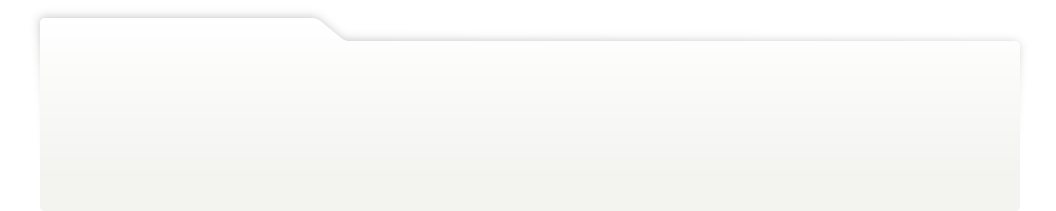
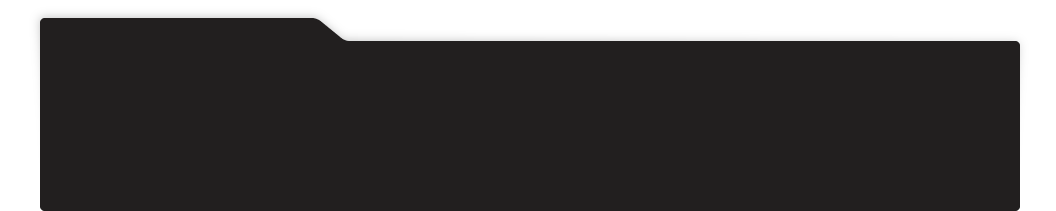
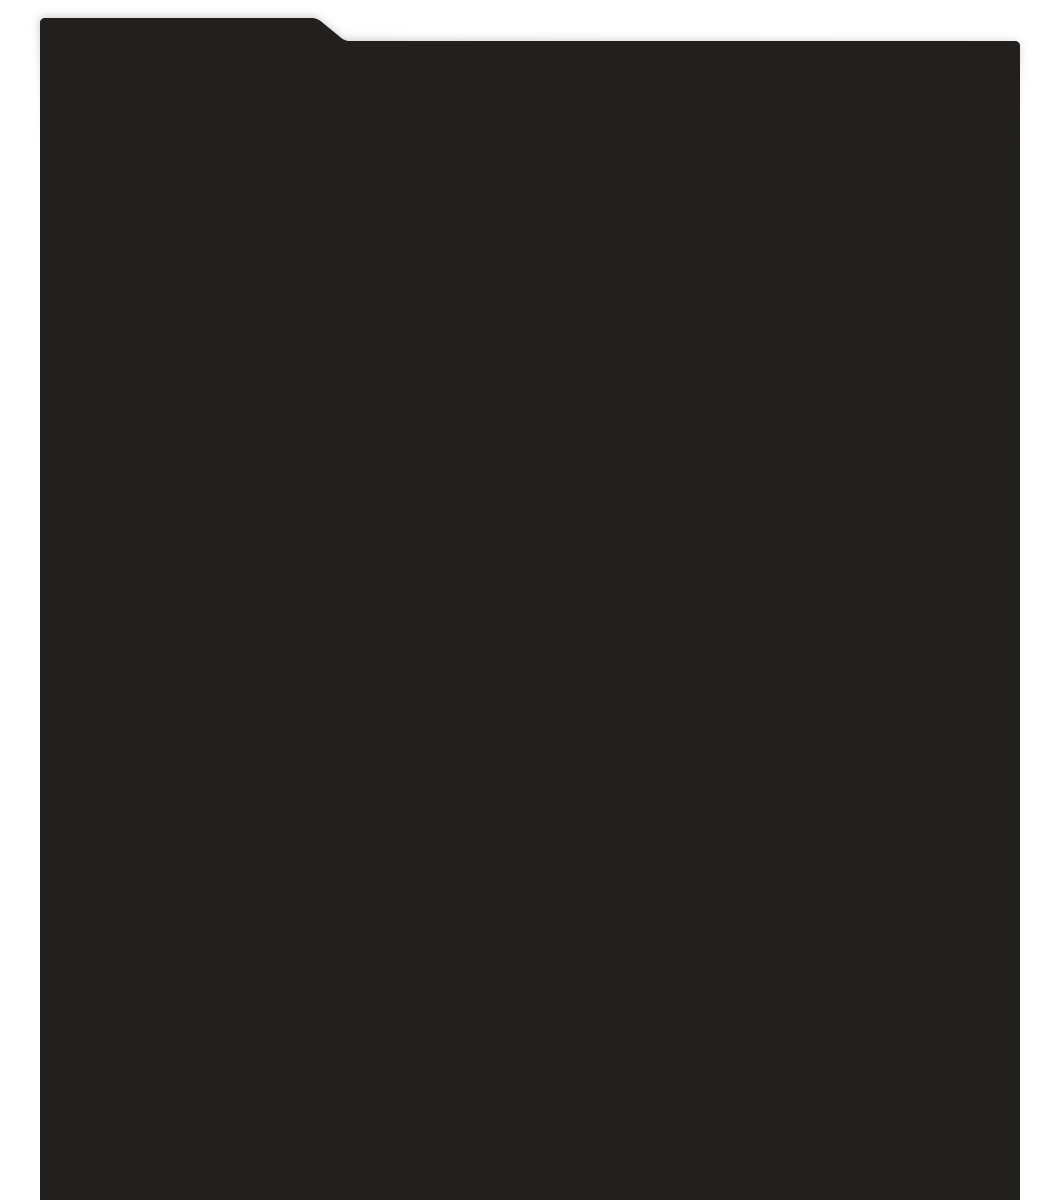
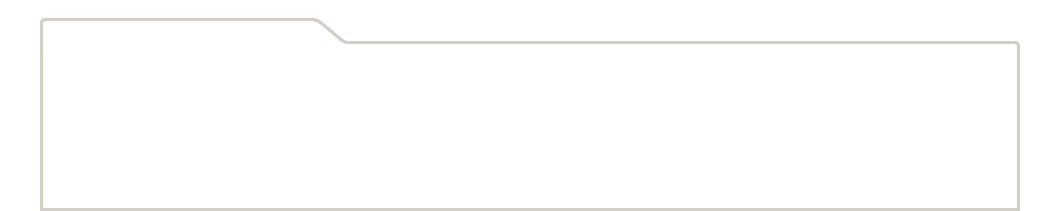
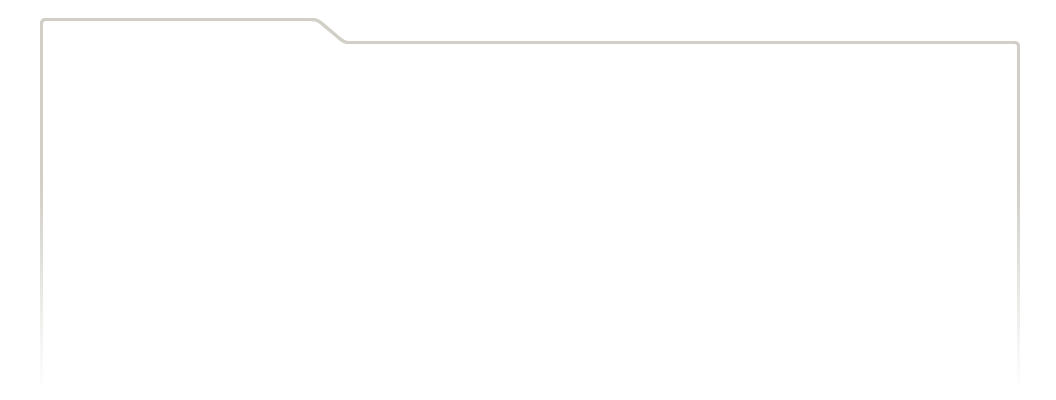
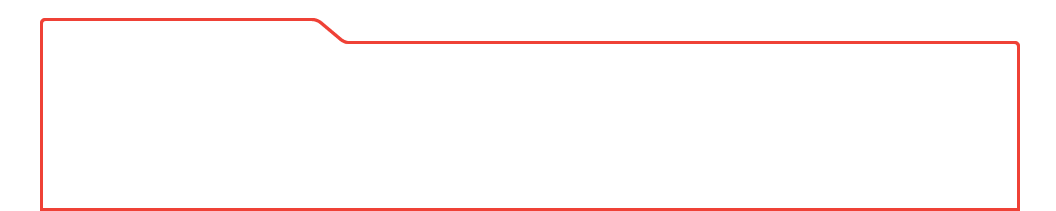
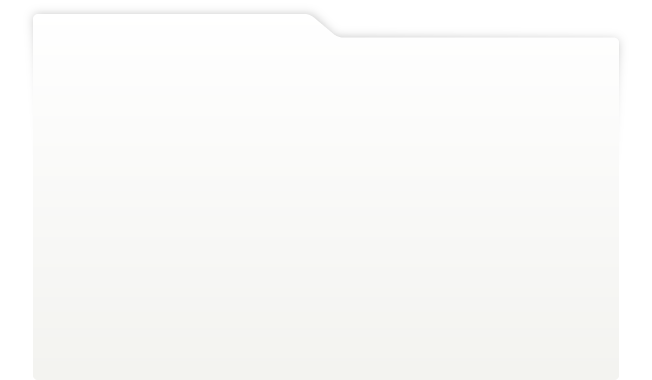
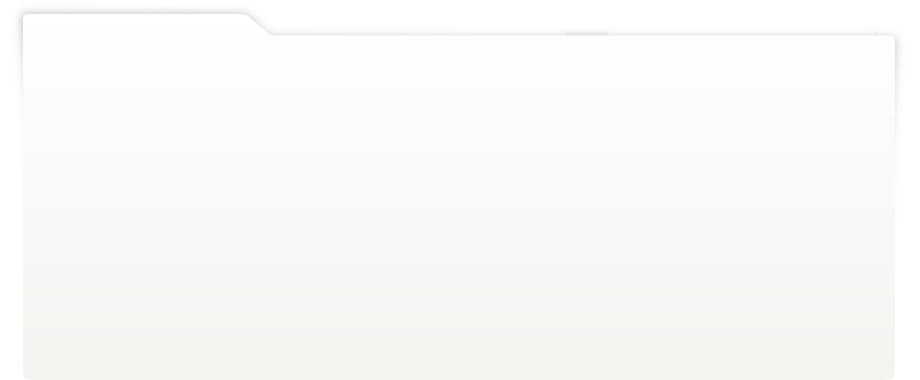
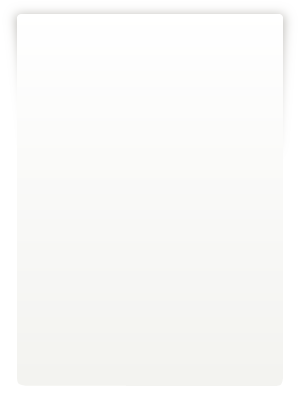
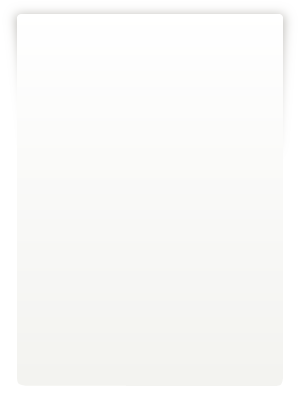
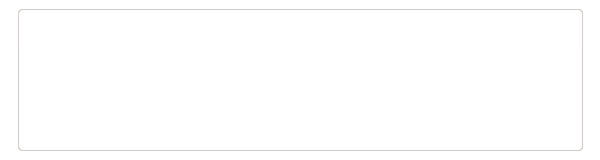
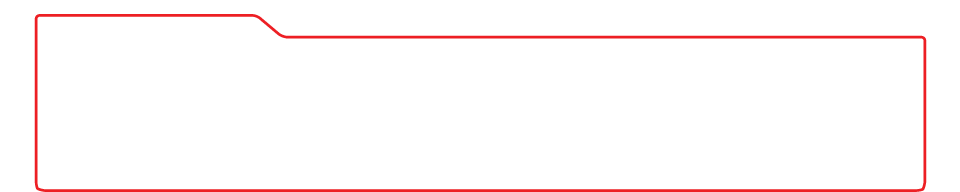
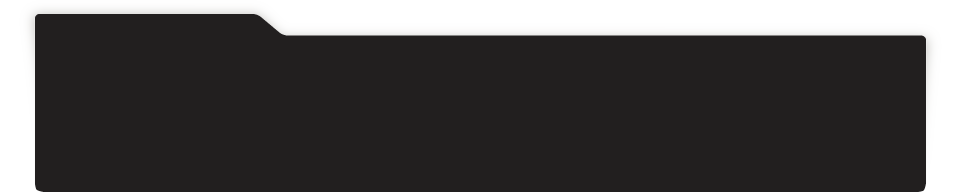
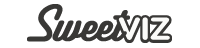
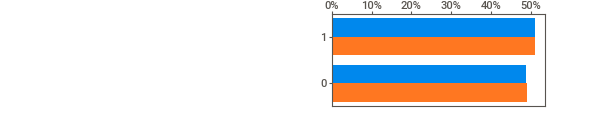
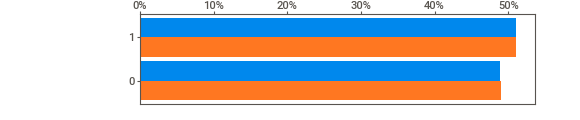
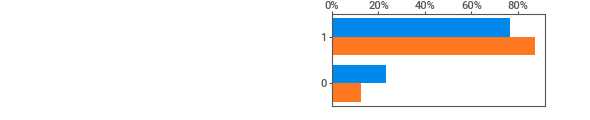
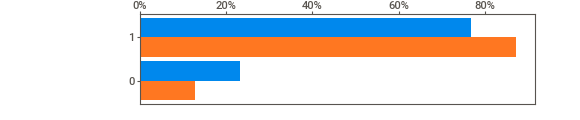
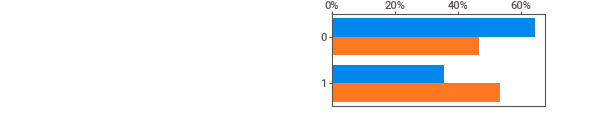
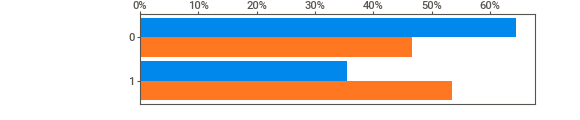
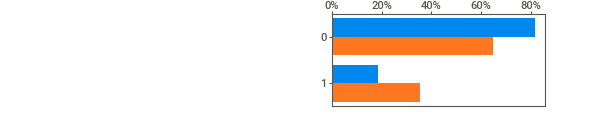
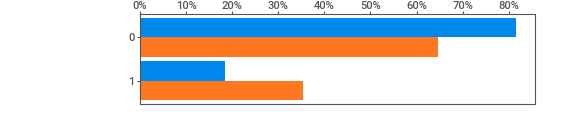
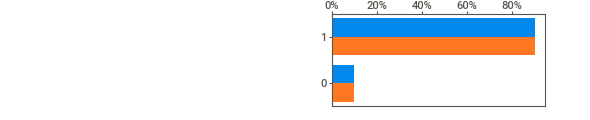
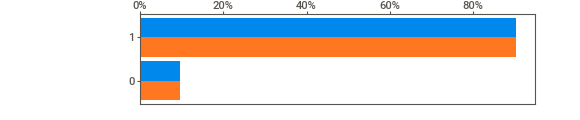
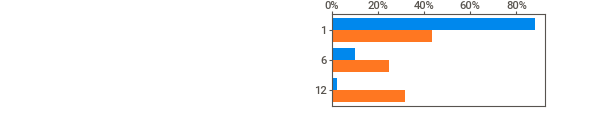
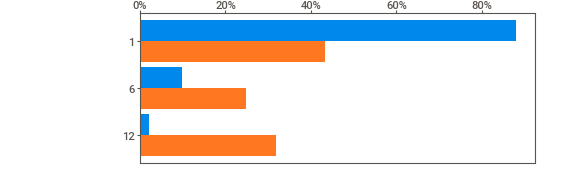
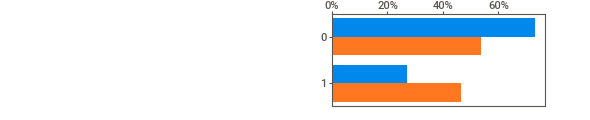
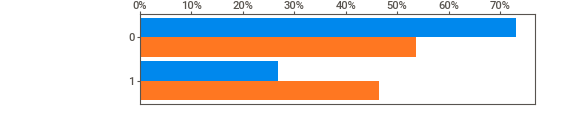
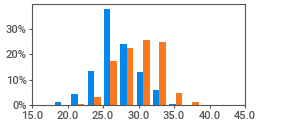
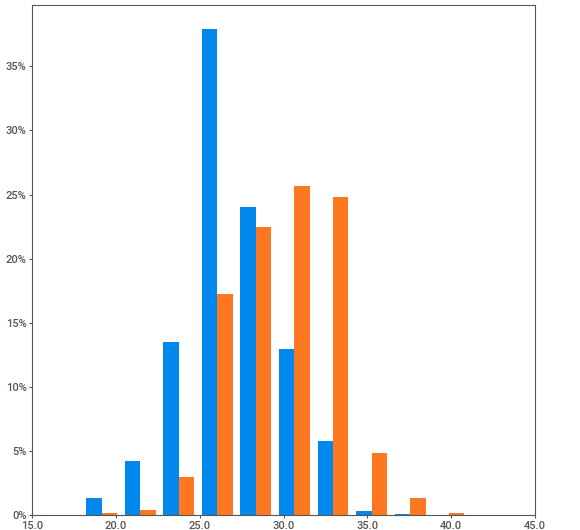
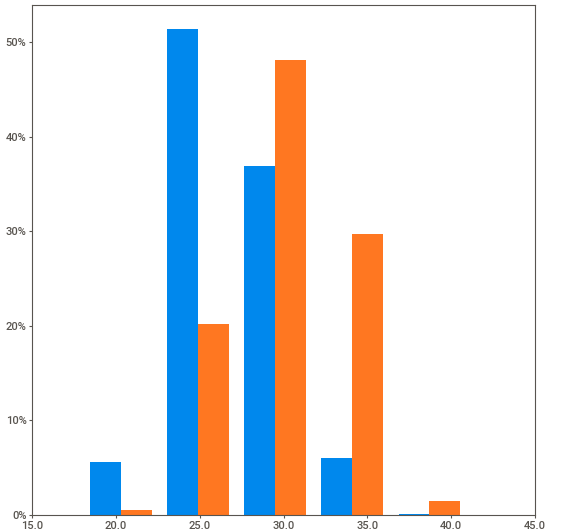
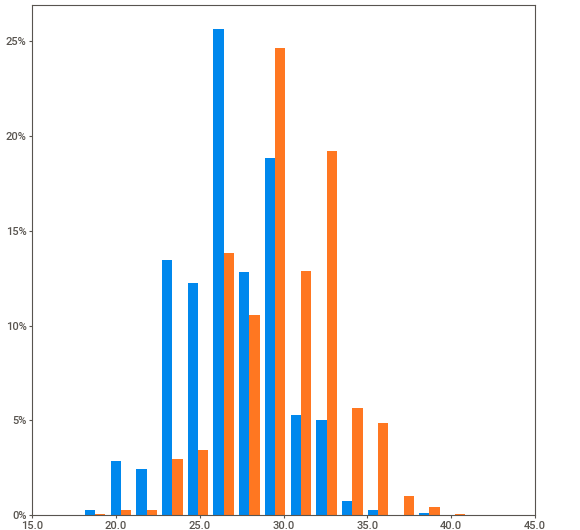
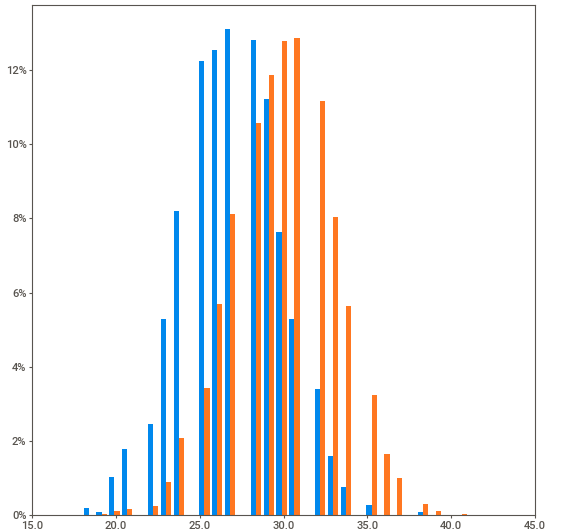
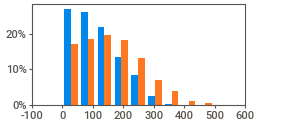
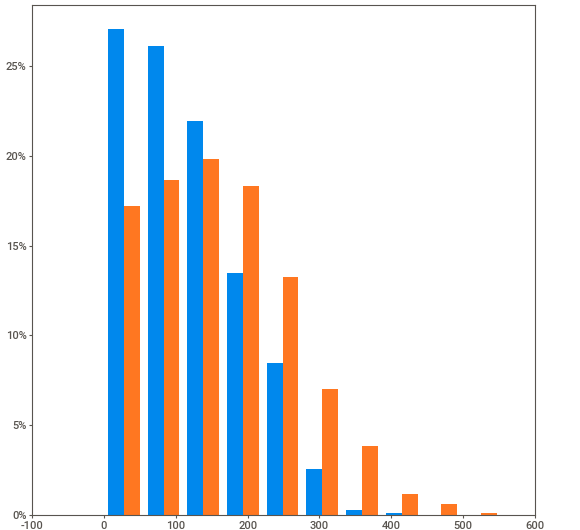
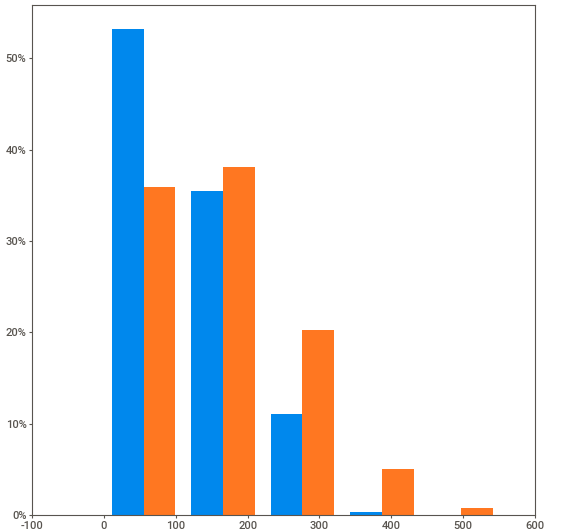
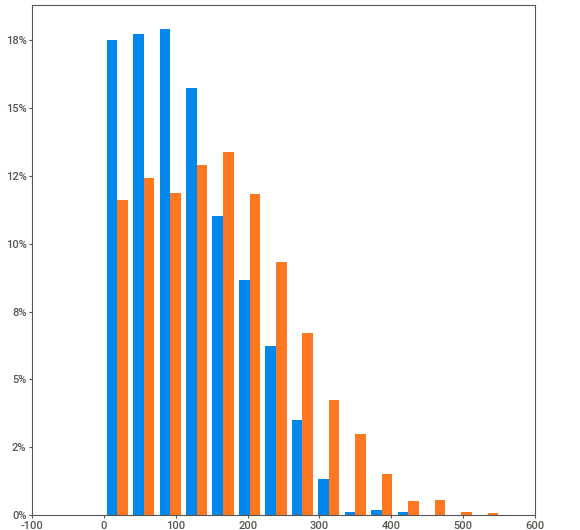
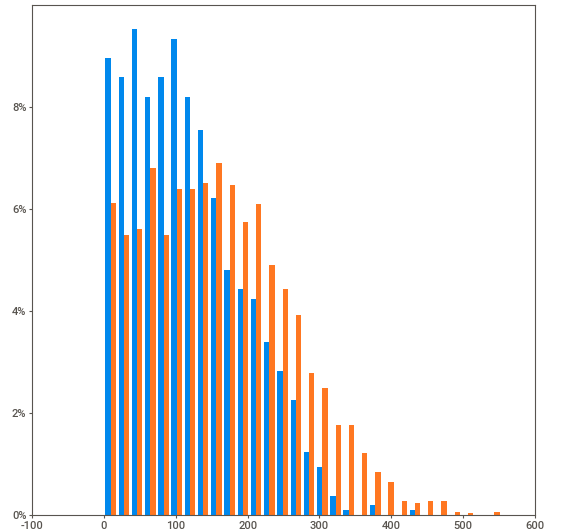
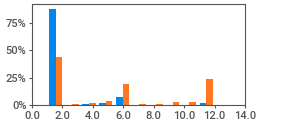
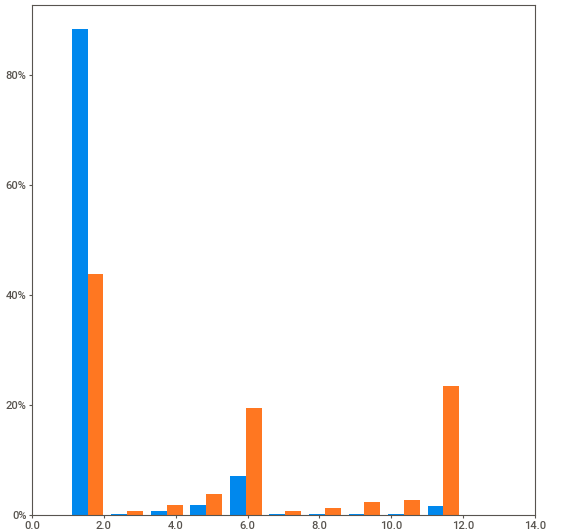
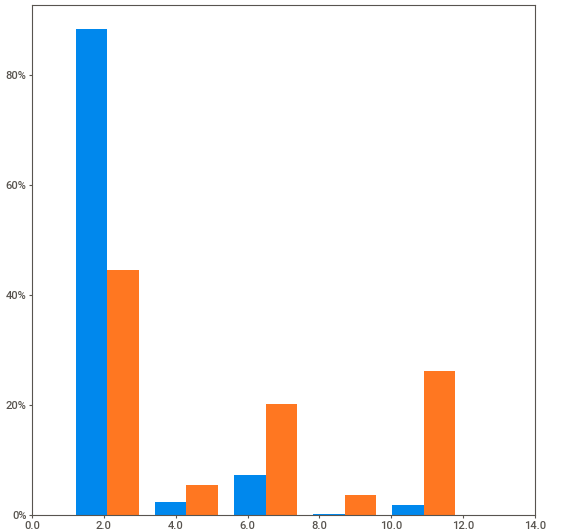
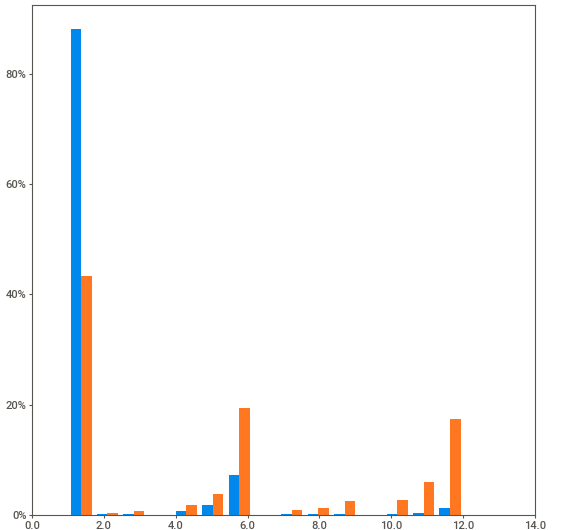
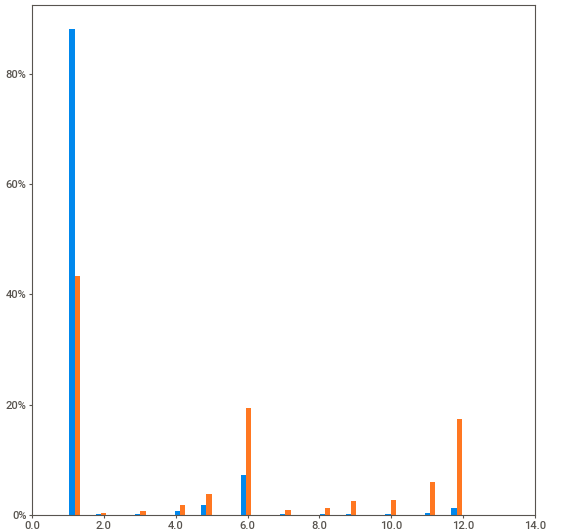
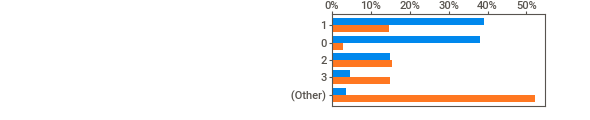
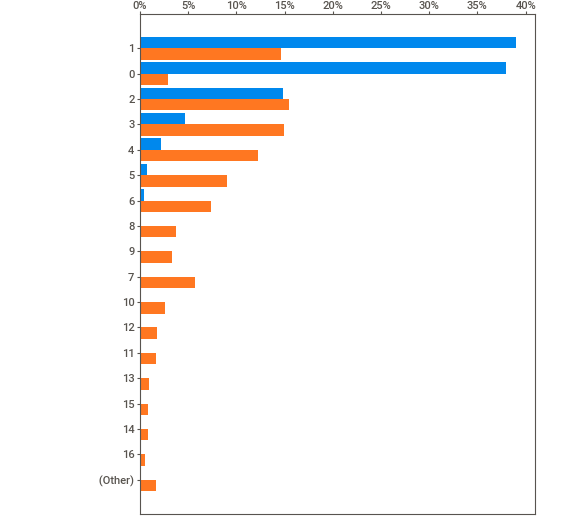
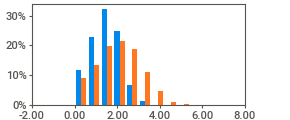
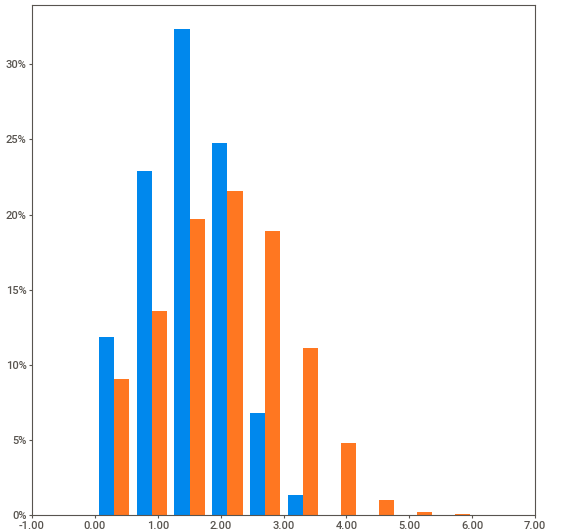
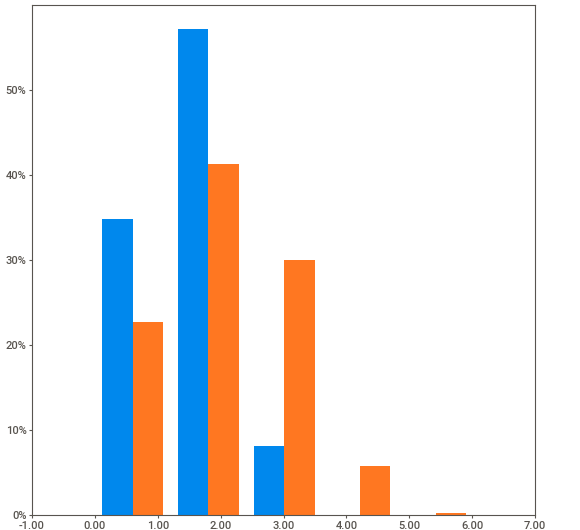
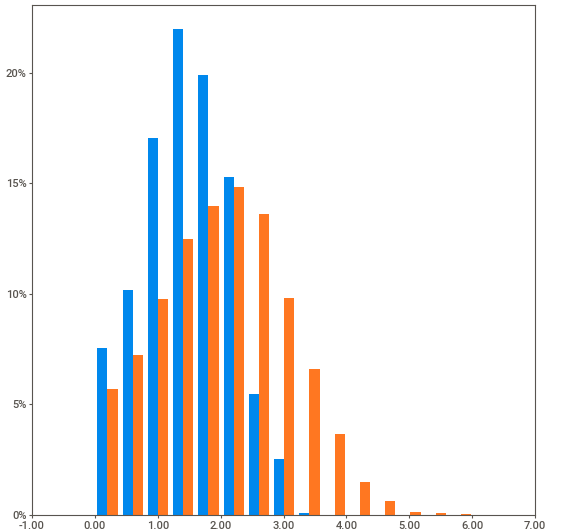
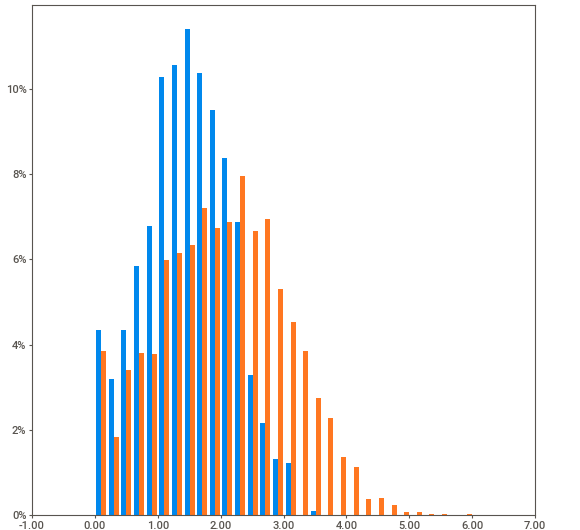
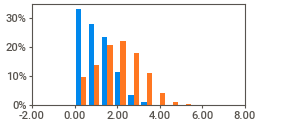
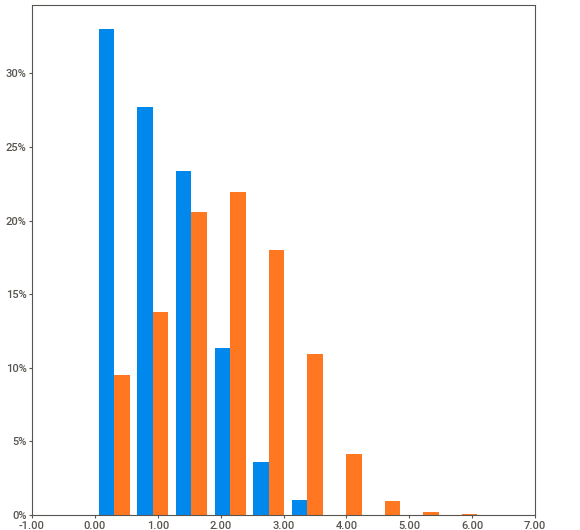
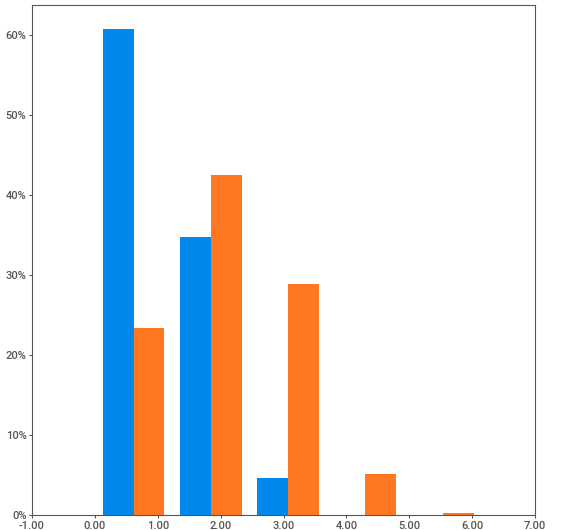
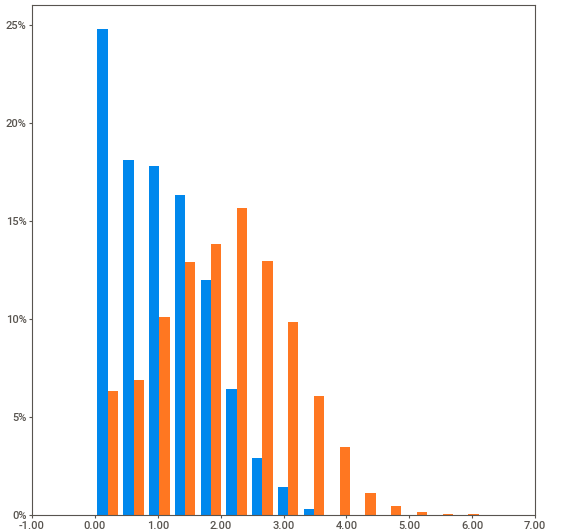
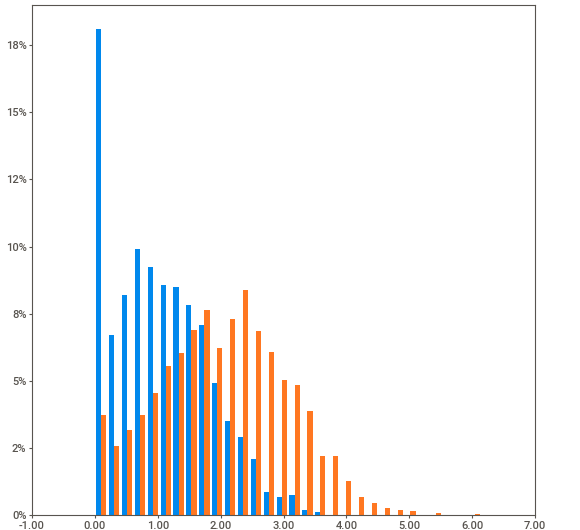
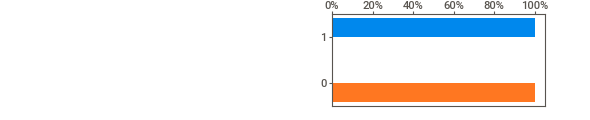
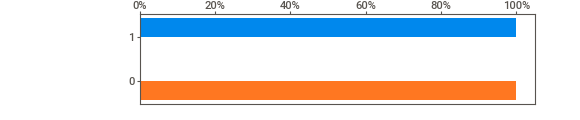
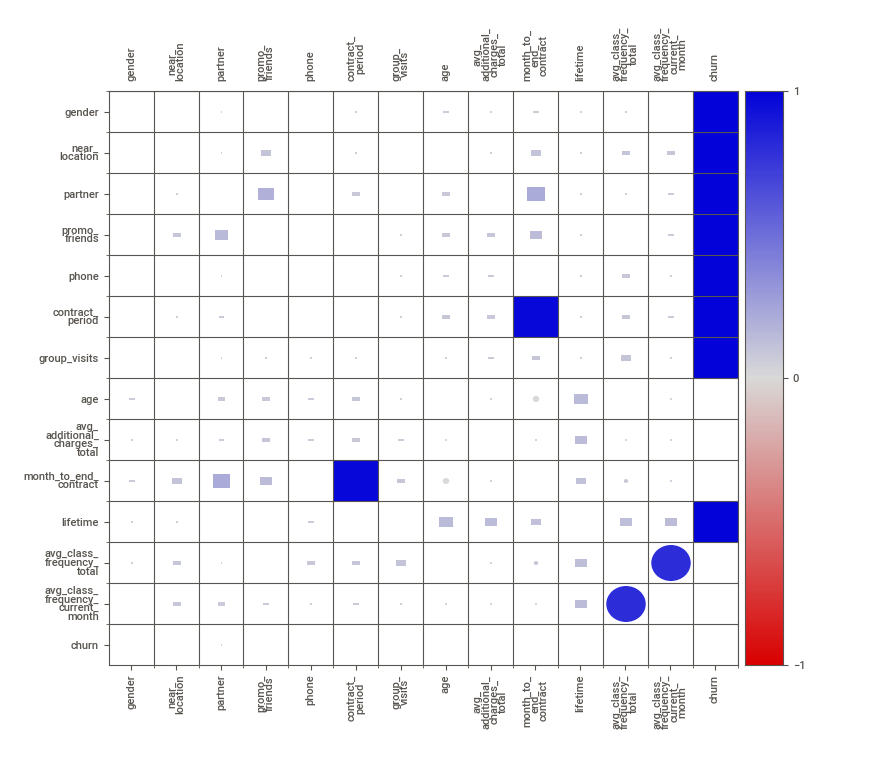
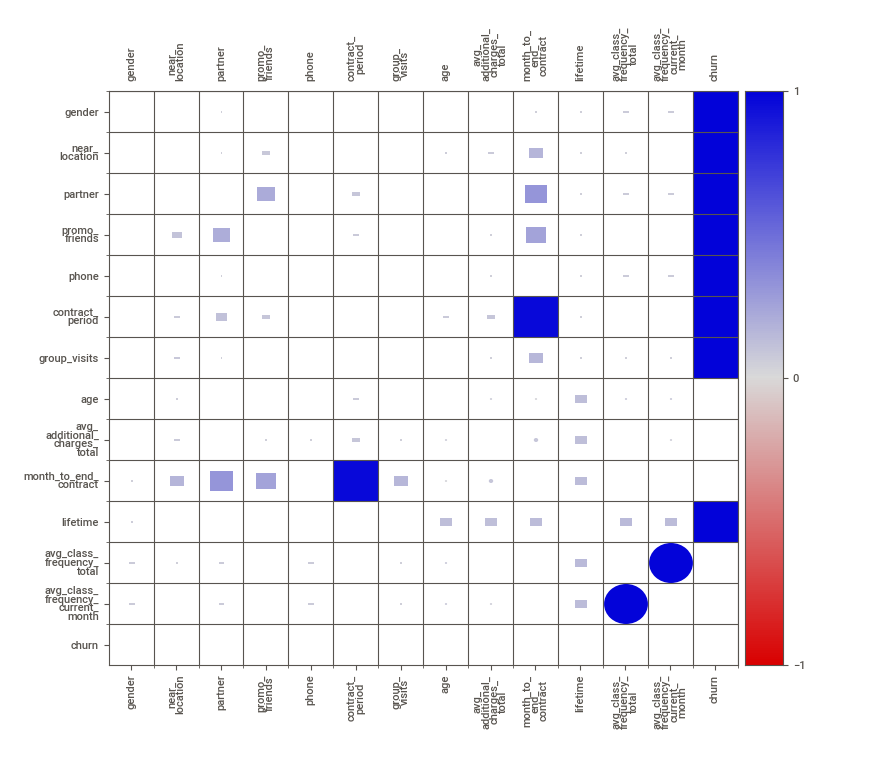

In [15]:
churned = data[data['churn'] == 1]
staying = data[data['churn'] == 0]

df1 = sv.compare([churned,'Churned'], [staying,'Staying'])
df1.show_notebook()

Here I can see all described above in more details. Genders are distributed almost evenly, no difference in phone column, slight difference in location in favor of active user. Over 80% of the lost customers had 1 month contract. Staying users are older, why younger ppl are leaving? Important question.

###### Build a correlation matrix and display it

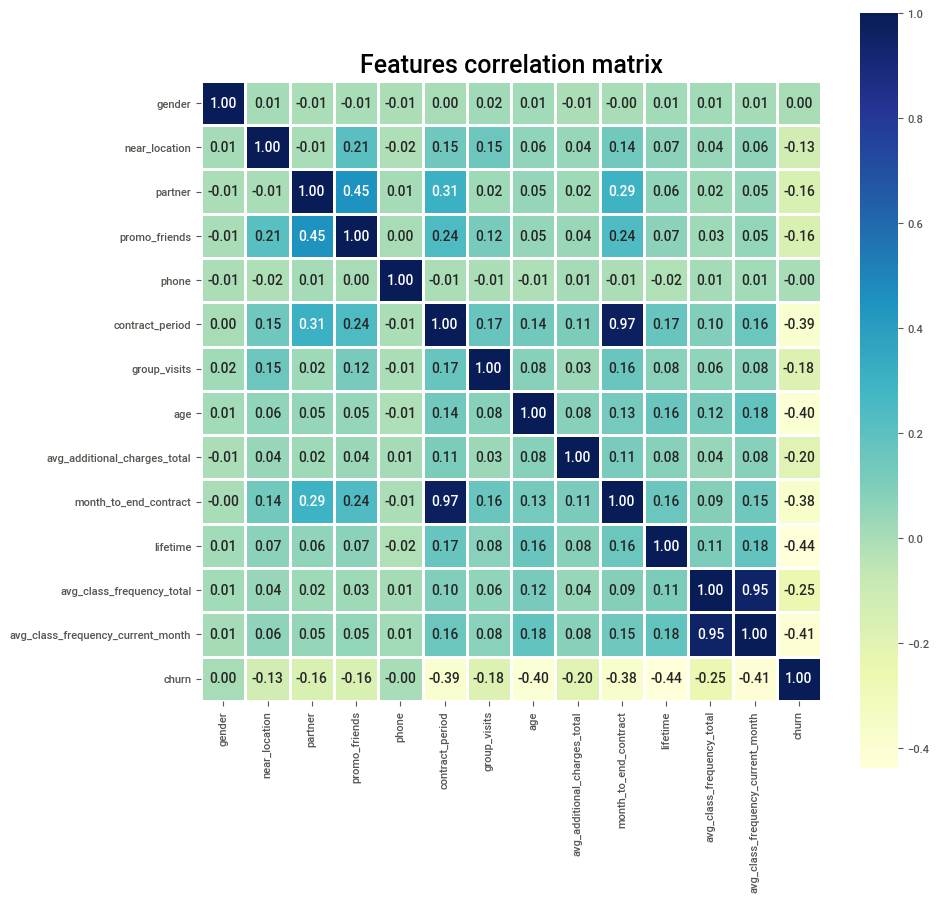

In [16]:
corr=data.corr()
plt.figure(figsize=(10,10))
plt.title('Features correlation matrix', fontsize=18)
sns.heatmap(corr, annot = True, square=True, fmt='.2f', linewidths=1, linecolor='white', cmap="YlGnBu");

Two strong correlation markers on the heatmap: Contract period + Month to end contract, Avg class frequency total + Avg class frequency current month, and both are almost meaningless. 
Promo friends and Partner do correlate, no wonder.
Slight correlation for Partner and Contract period.
Churn has weak negative correlations with Age, Contract period, lifetime, Month to end contract, Avg class frequency current month.

### 3. Churn prediction model
*Build a binary classification model for customers where the target feature is the user's leaving next month*

###### Divide the data into train and validation sets using the train_test_split() function

In [17]:
X = data.drop('churn', axis=1)
y = data.churn

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

All set

###### Logistic regression model

In [19]:
lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_probabilities = lr_model.predict_proba(X_test)[:,1]

###### Random forest model

In [20]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state=0)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_probabilities = rf_model.predict_proba(X_test)[:,1]

###### Gradient boosting model 

In [21]:
gb_model = GradientBoostingClassifier(n_estimators = 100, random_state = 0)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
gb_probabilities = gb_model.predict_proba(X_test)[:,1]

Added gradient boosting just to check it out

###### Evaluate accuracy, precision, and recall for both models using the validation data. Compare the models. 
*Which model gave better results?*

In [22]:
def show_metrix(y_true, y_pred, y_proba, title = 'Classification metrics'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))
show_metrix(y_test, lr_predictions, lr_probabilities , title='Logistic Regression:')
show_metrix(y_test, rf_predictions, rf_probabilities, title = 'Random Forest:')
show_metrix(y_test, gb_predictions, gb_probabilities, title = 'Gradient Boosting:')

Logistic Regression:
	Accuracy: 0.93
	Precision: 0.86
	Recall: 0.83
	F1: 0.85
	ROC_AUC: 0.97
Random Forest:
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.82
	F1: 0.83
	ROC_AUC: 0.97
Gradient Boosting:
	Accuracy: 0.93
	Precision: 0.88
	Recall: 0.84
	F1: 0.86
	ROC_AUC: 0.98


All the models seem to do OK. Random forest did it better than Logistic regression here, Gradient Boosting shows the best overall score. 

### Step 4. User clusters

###### Standardize the data

In [23]:
sc = StandardScaler()
X_st = sc.fit_transform(X)

###### Use the linkage() function to build a matrix of distances based on the standardized feature matrix and plot a dendrogram. Note: rendering the dendrogram may take time! Use the resulting graph to estimate the number of clusters you can single out.

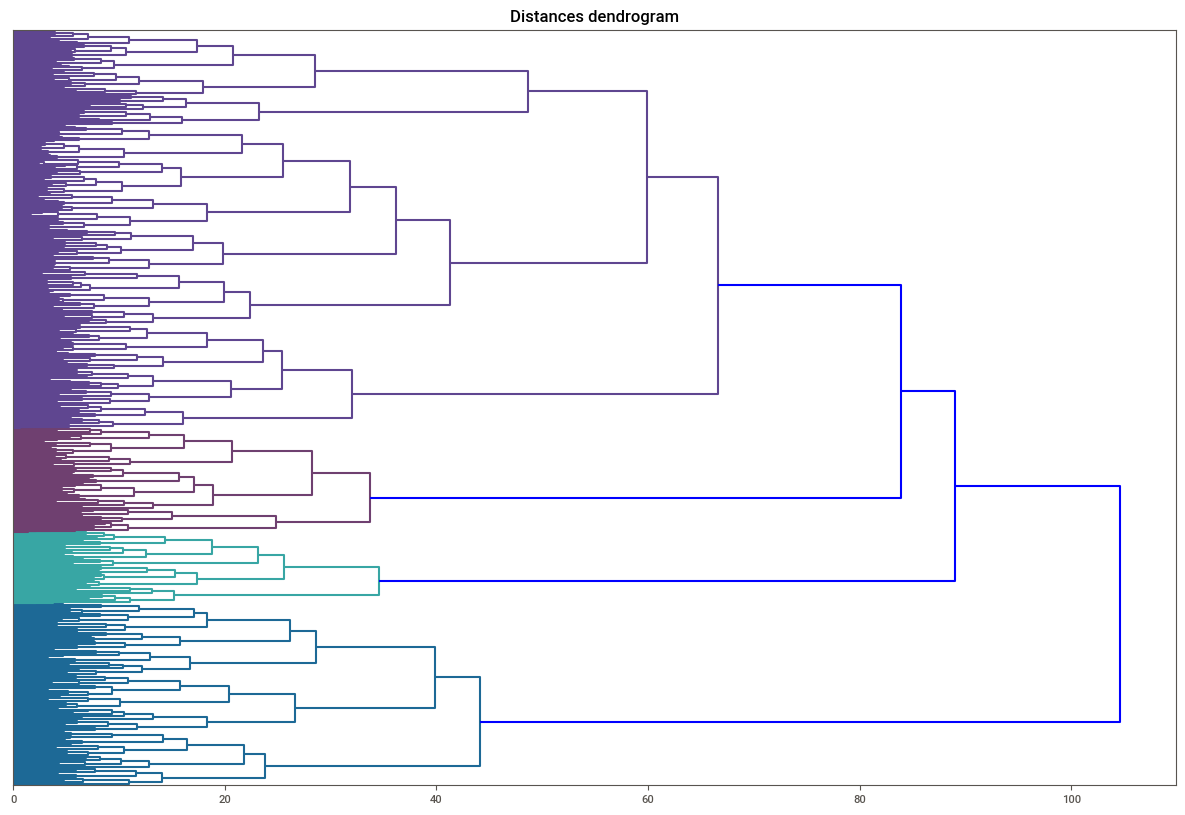

In [24]:
from scipy.cluster import hierarchy
linked = linkage(X_st, method = 'ward') 
plt.figure(figsize=(15, 10))  
hierarchy.set_link_color_palette(['#1d6996','#38a6a4','#6f4070','#5f4690','#0f8554'])
hierarchy.dendrogram(linked, orientation='right')
plt.title('Distances dendrogram')
ax = plt.gca()
ax.axes.yaxis.set_visible(False)
plt.show()

I like dendrogramm' appearance. It suggests 4 clusters, but let's say the purple can be divided, so it's 5. 

###### Train the clustering model with the K-means algorithm and predict customer clusters.

In [25]:
km = KMeans(n_clusters = 5, random_state=0) 
labels = km.fit_predict(X_st)

5 clusters set, cluster vector formed

###### Look at the mean feature values for clusters. Does anything catch your eye?

In [26]:
data['label'] = labels
data.groupby('label').mean().T

label,0,1,2,3,4
gender,0.502473,0.522078,0.495050,0.485737,0.560335
near_location,0.959446,0.862338,0.000000,1.000000,0.976105
partner,0.783383,0.470130,0.463366,0.350238,0.356033
promo_friends,0.574679,0.306494,0.079208,0.240095,0.229391
phone,1.000000,0.000000,1.000000,1.000000,0.998805
contract_period,10.884273,4.787013,2.352475,1.948494,2.665472
group_visits,0.543027,0.425974,0.215842,0.341521,0.473118
age,29.980218,29.301299,28.477228,28.167987,30.127838
avg_additional_charges_total,160.706969,143.957664,135.457501,131.622204,161.724258
month_to_end_contract,9.950544,4.475325,2.198020,1.856577,2.455197


1st cluster are those who did not leave phone numbers, has the shortest contract period, and the highest churn.
4th cluster has the most friend referrals and high number of partner program participants, the longest contract period and the most months to end, descent lifetime, and highest additional charges, most group visits, and higher near_location value.

###### Plot distributions of features for the clusters. Do you notice anything?

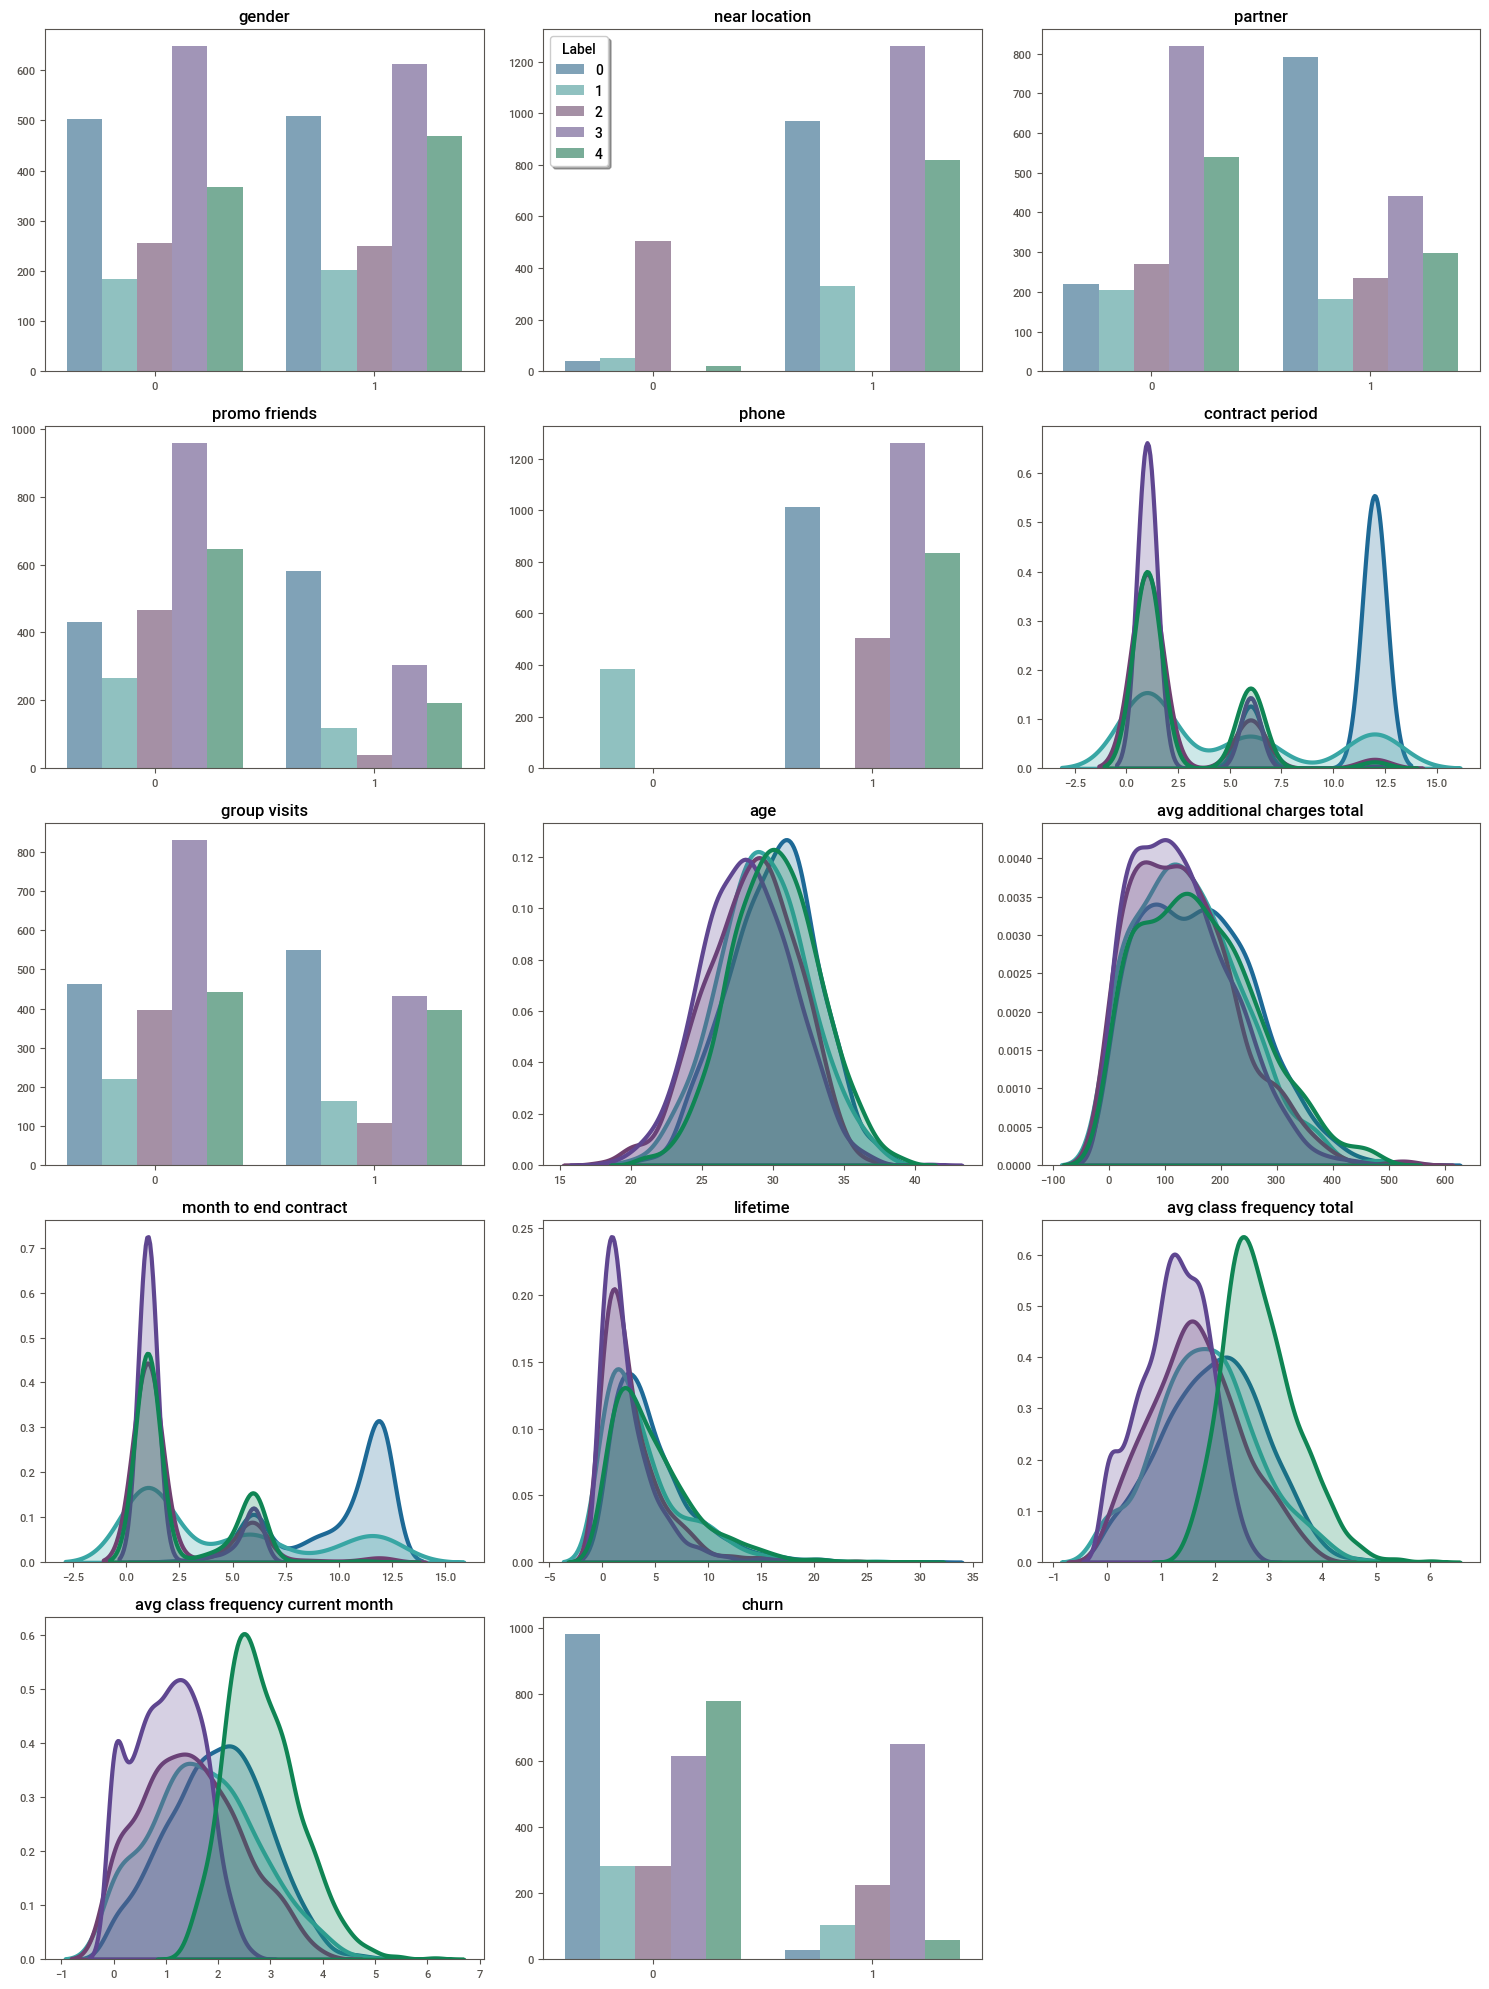

In [27]:
colors = ['#1d6996','#38a6a4','#6f4070','#5f4690','#0f8554']
plt.figure(figsize=(15,20))
the_grid = GridSpec(5, 3)
for i, column in enumerate(data.drop('label', axis = 1).columns):
    plt.subplot(the_grid[i//3, i%3], title=column.replace('_',' '))
    labels = sorted(data['label'].unique())
    if data[column].unique().sum() > 1:    
        for i,x in enumerate(labels):
            sns.distplot(data[data['label'] == x][column], hist = False, 
                         kde_kws = {'shade': True, 'linewidth': 3}, color=colors[i])
    else:
        sns.countplot(column, hue='label', data=data, palette=colors, alpha=.6)
        plt.gca().get_legend().remove()
    if column == 'near_location':
        legend = sorted(data['label'].unique())
        plt.legend(legend, shadow=True, title='Label', loc='best')
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()
plt.suptitle('label distributions by cluster', fontsize=22, y=1.025)
plt.show();

Genders are distributed almost equally, location have some variance with the 4th cluster of more closely residing customers, and the 3d are furthermost. 3rd cluster has most partners, 4th slightly less, 2, 0 — much less, 1st — none. 4th cluster has most friend referrals, 3rd a little less, 0, 2 — much less, 1st — very little. Here on the graph we see again that zeroeth cluster consists of those preferred to not to leave their phone numbers. Contract period is by far the highest in the 4th cluster (I'd nicknamed it as a friends cluster!), 2+ times less for zeroeth group, and much less for the rest, Group visits vary slightly, 2nd cluster is a little bit older, 4th cluster has higher additional charges, and 3rd the least. Cluster 2 are are the most frequent visitors. 

In [28]:
data.groupby('label')['churn'].sum()/data.groupby('label')['churn'].count()

label
0    0.027695
1    0.267532
2    0.443564
3    0.514263
4    0.068100
Name: churn, dtype: float64

Clusters 4, 2 are loyal customers. 0 is not so reliable, 1 and 3 are in churnover.  

### 5. Conclusions and Recommendations
*Come up with conclusions and basic recommendations on working with customers*

Typical user portraits:

4th, Friends cluster, the most loyal
Is about 30 y.o.
Almost equal distribution of genders
Highest probability to live closer among all clusters  
75+% chance of being partner company employee
54+% chance to come by friend invitation
Most likely has 10 months of contract left
Most likely has a year long contract
Spends more, than less loyal groups

2nd, another loyal group, frequent visitors 
Is 30 y.o.
Almost equal distribution of genders
High probability to live closer
33+% chance of being partner company employee
19+% chance to come by friend invitation
Most likely has ~3 months of contract left
Most likely has a short-term contract
Spends more, than less loyal groups, about the same as 4th group

1st, Churnover cluster, most likely to leave
Is ~28 y.o.
Almost equal distribution of genders
Less likely lives nearby 
Is not a partner company employee
8% chance to come by friend invitation
Most likely has 1.7 months of contract left
Most likely has a short-term contract
Spends less

3rd, partner churnover cluster 
Is ~28 y.o.
Almost equal distribution of genders
Less likely lives nearby 
Is a partner company employee
45% chance to come by friend invitation
Most likely has ~2 months of contract left
Most likely has a short-term contract
Spends least of all

Suggested target audience portrait:
25-35 years old
Lives nearby
Is partner company employee
Have friends attending the gym 

Factors correlated with churn the most are additional charges, contract duration, time since first visit, age.
Clusters 4, 2 are loyal customers. Cluster 2 are the most frequent visitors. Clusters 1 and 3 are most likely to churn, and they are younger! It is very important to find out why younger audience is leaving. 
Friends and partners promo programs are effective, definitely worth of extending, they bring the most loyal customers. Probably Fitness Model company could seek to establish more partnership ties with other businesses capable of supplying customers. 4th cluster, the most loyal one, is the Friends cluster, probably new offers for friends can be developed, or maybe, incentives can be raised to promote some growth.
Obviously, most of those who leave, do it earlier, maybe large discounts for longer contracts could save part of them.